In [38]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [39]:
# Load CSV
train_file_path = '../data/train_set.csv'
test_file_path = '../data/test_set.csv'

In [40]:
train_df = pd.read_csv(train_file_path)
train_df.head()

,Unnamed: 0,mean_Delta,mean_Theta,mean_Alpha,mean_Beta,mean_Gamma,mean_Slow,mean_Low_beta,mean_Relative_gamma,Fp1_Delta,...,O2_Low_beta,O2_Relative_gamma,alpha_frontal,alpha_temporal,alpha_asymmetry,beta_frontal,beta_temporal,beat_asymmetry,participant_id,label
0,0,-110.329965,-121.299482,-123.725032,-131.335399,-134.971232,-123.031043,-128.526178,0.911535,-106.209371,...,-127.567021,0.902035,-0.002908,-0.000649,-0.003557,-0.002668,0.010859,0.008191,1,1
1,1,-110.383640,-121.158052,-123.636121,-130.643007,-134.449370,-123.097757,-128.670923,0.915570,-107.994728,...,-130.006559,0.915688,-0.005629,-0.008944,-0.014573,-0.001315,0.003450,0.002135,1,1
2,2,-111.593383,-120.712248,-124.276396,-130.440765,-134.357490,-123.286220,-130.602665,0.917598,-110.782820,...,-131.785838,0.918551,-0.003908,-0.004460,-0.008369,0.000354,0.002001,0.002355,1,1
3,3,-111.292704,-122.189083,-123.512155,-128.614875,-135.116331,-123.276588,-127.691734,0.912374,-108.605531,...,-129.835990,0.924993,-0.005010,0.010191,0.005181,-0.005576,0.003535,-0.002042,1,1
4,4,-113.361314,-119.989890,-123.255042,-130.600926,-135.144714,-122.298936,-129.782153,0.904948,-109.577307,...,-131.338841,0.901524,0.001069,-0.002919,-0.001850,-0.007245,0.008795,0.001550,1,1


In [41]:
train_df.shape

(336, 145)

In [42]:
# Check for imbalance
train_df['label'].value_counts()

0    192
1    144
Name: label, dtype: int64

In [43]:
# Select equal number of samples from each label
label_1 = train_df.loc[train_df['label'] == 1]
label_1.shape

(144, 145)

In [44]:
label_0 = train_df.loc[train_df['label'] == 0].sample(n=label_1.shape[0], random_state=999)
label_0.shape

(144, 145)

In [45]:
new_df = pd.concat([label_1, label_0])
new_df['label'].value_counts()

1    144
0    144
Name: label, dtype: int64

In [46]:
# Feature selection/extraction
X_train = new_df[['mean_Delta', 'mean_Theta', 'mean_Alpha', 'mean_Beta', 'mean_Gamma', 'mean_Slow', 'mean_Low_beta', 'Fp1_Delta', 'Fp1_Theta', 'Fp1_Alpha', 'Fp1_Beta', 'Fp1_Gamma', 'Fp1_Slow', 'Fp1_Low_beta', 'Fp2_Delta', 'Fp2_Theta', 'Fp2_Alpha', 'Fp2_Beta', 'Fp2_Gamma', 'Fp2_Slow', 'Fp2_Low_beta', 'F7_Delta', 'F7_Theta', 'F7_Alpha', 'F7_Beta', 'F7_Gamma', 'F7_Slow', 'F7_Low_beta', 'F3_Delta', 'F3_Theta', 'F3_Alpha', 'F3_Beta', 'F3_Gamma', 'F3_Slow', 'F3_Low_beta', 'F4_Delta', 'F4_Theta', 'F4_Alpha', 'F4_Beta', 'F4_Gamma', 'F4_Slow', 'F4_Low_beta', 'F8_Delta', 'F8_Theta', 'F8_Alpha', 'F8_Beta', 'F8_Gamma', 'F8_Slow', 'F8_Low_beta', 'T3_Delta', 'T3_Theta', 'T3_Alpha', 'T3_Beta', 'T3_Gamma', 'T3_Slow', 'T3_Low_beta', 'C3_Delta', 'C3_Theta', 'C3_Alpha', 'C3_Beta', 'C3_Gamma', 'C3_Slow', 'C3_Low_beta', 'C4_Delta', 'C4_Theta', 'C4_Alpha', 'C4_Beta', 'C4_Gamma', 'C4_Slow', 'C4_Low_beta', 'T4_Delta', 'T4_Theta', 'T4_Alpha', 'T4_Beta', 'T4_Gamma', 'T4_Slow', 'T4_Low_beta', 'T5_Delta', 'T5_Theta', 'T5_Alpha', 'T5_Beta', 'T5_Gamma', 'T5_Slow', 'T5_Low_beta', 'P3_Delta', 'P3_Theta', 'P3_Alpha', 'P3_Beta', 'P3_Gamma', 'P3_Slow', 'P3_Low_beta', 'P4_Delta', 'P4_Theta', 'P4_Alpha', 'P4_Beta', 'P4_Gamma', 'P4_Slow', 'P4_Low_beta', 'T6_Delta', 'T6_Theta', 'T6_Alpha', 'T6_Beta', 'T6_Gamma', 'T6_Slow', 'T6_Low_beta', 'O1_Delta', 'O1_Theta', 'O1_Alpha', 'O1_Beta', 'O1_Gamma', 'O1_Slow', 'O1_Low_beta', 'O2_Delta', 'O2_Theta', 'O2_Alpha', 'O2_Beta', 'O2_Gamma', 'O2_Slow', 'O2_Low_beta', 'alpha_frontal', 'alpha_temporal', 'alpha_asymmetry', 'beta_frontal', 'beta_temporal', 'beat_asymmetry']]
y_train = new_df[['label']]

In [47]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
y_train = y_train.reshape(-1)

In [48]:
X_train_scaled = np.zeros_like(X_train)
print(X_train_scaled.shape)

scalers = {}
for i in range(X_train.shape[1]):
    scalers[i] = MinMaxScaler(feature_range=(-1, 1))
    X_minmax = scalers[i].fit_transform(X_train[:,i].reshape(-1, 1))
    X_train_scaled[:,i] = X_minmax[:,0]

(288, 125)


In [49]:
# Grid serach

# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','poly','rbf', 'sigmoid']} 
# param_grid = {'C': [0.1, 1, 10, 100, 1000], 
#               'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['sigmoid']} 

estimator = SVC(max_iter=10000)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=999)
    
grid = GridSearchCV(estimator, 
                    param_grid, 
                    cv=cv,
                    refit = True, 
                    verbose = 0)
  
# Fitting the model for grid search
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=999, test_size=0.2,
            train_size=None),
             estimator=SVC(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [50]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1, max_iter=10000)


In [51]:
test_df = pd.read_csv(test_file_path)
test_df.head()

,Unnamed: 0,mean_Delta,mean_Theta,mean_Alpha,mean_Beta,mean_Gamma,mean_Slow,mean_Low_beta,mean_Relative_gamma,Fp1_Delta,...,O2_Low_beta,O2_Relative_gamma,alpha_frontal,alpha_temporal,alpha_asymmetry,beta_frontal,beta_temporal,beat_asymmetry,participant_id,label
0,24,-105.610057,-117.490805,-119.145752,-121.182240,-121.880042,-118.891691,-121.631955,0.975481,-100.980513,...,-120.804800,0.967041,0.015743,-0.003737,0.012006,-0.004346,-0.002382,-0.006728,2,1
1,25,-108.592535,-115.965217,-119.922452,-121.613911,-121.485027,-118.781369,-120.347664,0.977745,-108.459047,...,-120.068129,0.965655,0.016350,-0.001645,0.014705,-0.003999,-0.003525,-0.007525,2,1
2,26,-108.456727,-116.925839,-118.330785,-121.740811,-121.704059,-118.191615,-120.959829,0.971139,-109.291422,...,-119.303841,0.961283,0.019742,0.008618,0.028360,-0.000686,0.002217,0.001531,2,1
3,27,-106.590788,-117.160891,-119.011934,-121.036845,-122.315027,-118.479540,-120.191081,0.968643,-103.530862,...,-118.836998,0.951246,0.020870,0.000877,0.021746,-0.009253,0.002545,-0.006707,2,1
4,28,-107.477566,-117.967757,-118.086434,-121.209063,-121.741605,-118.284413,-120.344260,0.971602,-103.626728,...,-119.825284,0.960349,0.012745,0.010017,0.022762,-0.008301,-0.002240,-0.010540,2,1


In [52]:
X_test = test_df[['mean_Delta', 'mean_Theta', 'mean_Alpha', 'mean_Beta', 'mean_Gamma', 'mean_Slow', 'mean_Low_beta', 'Fp1_Delta', 'Fp1_Theta', 'Fp1_Alpha', 'Fp1_Beta', 'Fp1_Gamma', 'Fp1_Slow', 'Fp1_Low_beta', 'Fp2_Delta', 'Fp2_Theta', 'Fp2_Alpha', 'Fp2_Beta', 'Fp2_Gamma', 'Fp2_Slow', 'Fp2_Low_beta', 'F7_Delta', 'F7_Theta', 'F7_Alpha', 'F7_Beta', 'F7_Gamma', 'F7_Slow', 'F7_Low_beta', 'F3_Delta', 'F3_Theta', 'F3_Alpha', 'F3_Beta', 'F3_Gamma', 'F3_Slow', 'F3_Low_beta', 'F4_Delta', 'F4_Theta', 'F4_Alpha', 'F4_Beta', 'F4_Gamma', 'F4_Slow', 'F4_Low_beta', 'F8_Delta', 'F8_Theta', 'F8_Alpha', 'F8_Beta', 'F8_Gamma', 'F8_Slow', 'F8_Low_beta', 'T3_Delta', 'T3_Theta', 'T3_Alpha', 'T3_Beta', 'T3_Gamma', 'T3_Slow', 'T3_Low_beta', 'C3_Delta', 'C3_Theta', 'C3_Alpha', 'C3_Beta', 'C3_Gamma', 'C3_Slow', 'C3_Low_beta', 'C4_Delta', 'C4_Theta', 'C4_Alpha', 'C4_Beta', 'C4_Gamma', 'C4_Slow', 'C4_Low_beta', 'T4_Delta', 'T4_Theta', 'T4_Alpha', 'T4_Beta', 'T4_Gamma', 'T4_Slow', 'T4_Low_beta', 'T5_Delta', 'T5_Theta', 'T5_Alpha', 'T5_Beta', 'T5_Gamma', 'T5_Slow', 'T5_Low_beta', 'P3_Delta', 'P3_Theta', 'P3_Alpha', 'P3_Beta', 'P3_Gamma', 'P3_Slow', 'P3_Low_beta', 'P4_Delta', 'P4_Theta', 'P4_Alpha', 'P4_Beta', 'P4_Gamma', 'P4_Slow', 'P4_Low_beta', 'T6_Delta', 'T6_Theta', 'T6_Alpha', 'T6_Beta', 'T6_Gamma', 'T6_Slow', 'T6_Low_beta', 'O1_Delta', 'O1_Theta', 'O1_Alpha', 'O1_Beta', 'O1_Gamma', 'O1_Slow', 'O1_Low_beta', 'O2_Delta', 'O2_Theta', 'O2_Alpha', 'O2_Beta', 'O2_Gamma', 'O2_Slow', 'O2_Low_beta', 'alpha_frontal', 'alpha_temporal', 'alpha_asymmetry', 'beta_frontal', 'beta_temporal', 'beat_asymmetry']]
y_test = test_df[['label']]

In [53]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1)

In [54]:
X_test_scaled = np.zeros_like(X_test)

for i in range(X_test.shape[1]):
    X_test_minmax = scalers[i].transform(X_test[:,i].reshape(-1, 1))
    X_test_scaled[:,i] = X_test_minmax[:,0]

In [55]:
yhat = grid.predict(X_test_scaled)
accuracy_score(y_test, yhat)

0.6527777777777778

In [56]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79        48
           1       0.00      0.00      0.00        24

    accuracy                           0.65        72
   macro avg       0.33      0.49      0.39        72
weighted avg       0.44      0.65      0.53        72



In [57]:
#{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
final_svm = SVC(random_state=999, C=10, gamma=0.1, kernel='rbf', max_iter=10000)
final_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.1, max_iter=10000, random_state=999)

In [58]:
yhat = final_svm.predict(X_test_scaled)
accuracy_score(y_test, yhat)

0.6527777777777778

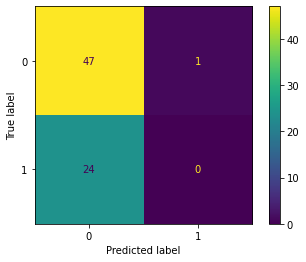

In [59]:
cm = confusion_matrix(y_test, yhat, labels=final_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=final_svm.classes_)
disp.plot()

plt.show()